# <center>Convolutional Neural Networks (CNNs)</center>
## <center>Benedek Dankó</center>

In [ ]:
# load libraries:
import numpy as np
import seaborn as sns
from google.colab import drive
from scipy.io import loadmat
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1 import ImageGrid
from sklearn.metrics import confusion_matrix


from tensorflow import keras
from tensorflow.keras.layers import *

%matplotlib inline

### 1. Load the MNIST dataset and create a CNN model

In [ ]:
# load data:
(x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data()
x_train = x_train/255 # normalize data to fall between 0-1
print(x_test.shape)
print(x_train.shape)
print(y_test.shape)
print(y_train.shape)

11493376/11490434 [==============================] - 0s 0us/step
(10000, 28, 28)
(60000, 28, 28)
(10000,)
(60000,)


In [ ]:
# convert data:
x_train = x_train.astype('float32')
x_test  = x_test.astype('float32')

y_train = keras.utils.to_categorical(y_train, 10)
y_test  = keras.utils.to_categorical(y_test,  10)

x_train = x_train.reshape((x_train.shape[0], 28, 28, 1))
x_test = x_test.reshape((x_test.shape[0], 28, 28, 1))

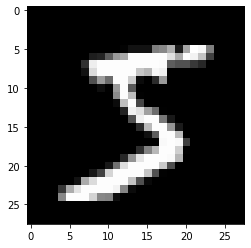

In [ ]:
plt.imshow(x_train[0][:,:,0], cmap='gray')
plt.show() # 5

In [ ]:
# set up CNN:
cnn_model = keras.models.Sequential()
cnn_model.add(Conv2D(16, (3, 3), input_shape=x_train.shape[1:], padding='valid'))
cnn_model.add(Activation('relu'))
cnn_model.add(Conv2D(16, (3, 3), padding='valid'))
cnn_model.add(Activation('relu'))
cnn_model.add(MaxPooling2D(pool_size=(2,2)))

cnn_model.add(Conv2D(32, (3, 3), padding='valid'))
cnn_model.add(Activation('relu'))
cnn_model.add(Conv2D(32, (3, 3), padding='valid'))
cnn_model.add(Activation('relu'))
cnn_model.add(MaxPooling2D(pool_size=(2,2)))
cnn_model.add(Flatten())

cnn_model.add(Dense(10))
cnn_model.add(Activation('softmax'))

In [ ]:
# check model summary:
cnn_model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 26, 26, 16)        160       
_________________________________________________________________
activation (Activation)      (None, 26, 26, 16)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 24, 24, 16)        2320      
_________________________________________________________________
activation_1 (Activation)    (None, 24, 24, 16)        0         
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 12, 12, 16)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 10, 10, 32)        4640      
_________________________________________________________________
activation_2 (Activation)    (None, 10, 10, 32)        0

You can observe the number of the parameters per layer in the last column. <br>
Total number of parameters: 21,498.

In [ ]:
# compile model with Adam optimizer, use categorical crossentropy as loss function:
cnn_model.compile(loss='categorical_crossentropy', optimizer=keras.optimizers.Adam(), metrics=['accuracy'])

In [ ]:
# fit model:
cnn_history = cnn_model.fit(x_train, y_train, batch_size=32,
                            epochs=5, validation_data=(x_test, y_test))

Epoch 1/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.1607 - accuracy: 0.9513 - val_loss: 6.0032 - val_accuracy: 0.9856
Epoch 2/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0500 - accuracy: 0.9850 - val_loss: 5.1748 - val_accuracy: 0.9881
Epoch 3/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0354 - accuracy: 0.9887 - val_loss: 3.2785 - val_accuracy: 0.9924
Epoch 4/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0282 - accuracy: 0.9914 - val_loss: 3.9526 - val_accuracy: 0.9910
Epoch 5/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0229 - accuracy: 0.9930 - val_loss: 3.2856 - val_accuracy: 0.9927


In [ ]:
print('Accuracy scores: {}'.format(cnn_history.history['val_accuracy']))
print('Categorical cross-entropy loss: {}'.format(cnn_history.history['val_loss']))

Accuracy scores: [0.9855999946594238, 0.988099992275238, 0.9923999905586243, 0.9909999966621399, 0.9926999807357788]
Categorical cross-entropy loss: [6.003158092498779, 5.17479944229126, 3.27847957611084, 3.952599287033081, 3.285616397857666]


The final validation accuracy is 99.27%, which is pretty good.

In [ ]:
# perform predictions: 
cnn_predictions = cnn_model.predict(x_test, batch_size=32)

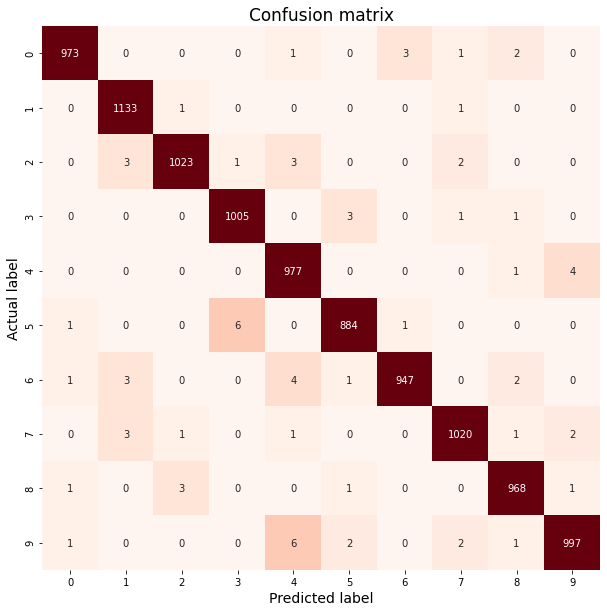

In [ ]:
# plot confusion matrix:
conf = confusion_matrix(y_pred=np.argmax(cnn_predictions, 1), y_true=np.argmax(y_test, 1))
plt.figure(figsize=(10, 10))
sns.heatmap(conf, annot=True, cmap='Reds', fmt='g', cbar=False, vmax=30)
plt.title('Confusion matrix', fontsize=17)
plt.xlabel('Predicted label', fontsize=14)
plt.ylabel('Actual label', fontsize=14)
plt.show()

After all, the model reached 99.27% accuracy. <br>
As you can see, the model missed a few 5s, and 9s, and predicted them as 3s, and 4s. <br>

Comparing to the fully-connected NN, the CNN predicted for example the 3s and 4s more accurately.

### 2. Download the Street View House Numbers (SVHN) Dataset

Download data from http://ufldl.stanford.edu/housenumbers/:

In [5]:
%%bash

wget http://ufldl.stanford.edu/housenumbers/train_32x32.mat
wget http://ufldl.stanford.edu/housenumbers/test_32x32.mat

In [ ]:
test = loadmat('test_32x32.mat')
train = loadmat('train_32x32.mat')

In [ ]:
print(test.keys())
print(train.keys())

dict_keys(['__header__', '__version__', '__globals__', 'X', 'y'])
dict_keys(['__header__', '__version__', '__globals__', 'X', 'y'])


In [ ]:
# get training, test datasets:
train_x = train['X']
train_y = train['y']

test_x = test['X']
test_y = test['y']

In [ ]:
print(train_x.shape)
print(test_x.shape)
print(train_y.shape)
print(test_y.shape)

(32, 32, 3, 73257)
(32, 32, 3, 26032)
(73257, 1)
(26032, 1)


In [ ]:
# 10 different labels:
set([i[0] for i in list(train_y)])

{1, 2, 3, 4, 5, 6, 7, 8, 9, 10}

In [ ]:
# unpack the y arrays:
train_y = np.asanyarray([i[0]-1 for i in list(train_y)])
test_y = np.asanyarray([i[0]-1 for i in list(test_y)])

In [ ]:
# visualize 5 images randomly:
def show_train_imgs(n=8, m=1):
    for i in range(m):
        for j in range(n):
            idx = np.random.randint(len(y_train))
            plt.subplot(int('1' + str(n) + str(j+1)))
            plt.imshow(np.einsum('klij->jkli', train_x)[idx].astype('int'))
            plt.title('Label: {}'.format(train_y[idx]), fontsize=20)
            plt.axis('off')
        plt.show()

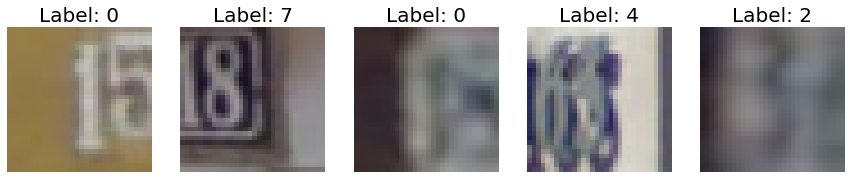

In [ ]:
plt.rcParams['figure.figsize'] = (15, 5)
show_train_imgs(5)

In [ ]:
# convert data, one-hot encoding of the labels:
train_x = np.einsum('klij->jkli', train_x)
test_x = np.einsum('klij->jkli', test_x)

train_y = keras.utils.to_categorical(train_y, 10)
test_y  = keras.utils.to_categorical(test_y, 10)

In [ ]:
# required shapes of the data:
print(train_x.shape)
print(test_x.shape)
print(train_y.shape)
print(test_y.shape)

(73257, 32, 32, 3)
(26032, 32, 32, 3)
(73257, 10)
(26032, 10)


We have 10 classes in this dataset. <br>
Furthermore, we have 73257 train examples and 26032 test examples. <br>
Dimension of the images: 32 x 32 pixels with 3 color chanels.

### 3. Train the CNN model seen in the 1st exercise for this dataset

In [ ]:
# set up CNN:
cnn_model = keras.models.Sequential()
cnn_model.add(Conv2D(16, (3, 3), input_shape=train_x.shape[1:], padding='valid'))
cnn_model.add(Activation('relu'))
cnn_model.add(Conv2D(16, (3, 3), padding='valid'))
cnn_model.add(Activation('relu'))
cnn_model.add(MaxPooling2D(pool_size=(2,2)))

cnn_model.add(Conv2D(32, (3, 3), padding='valid'))
cnn_model.add(Activation('relu'))
cnn_model.add(Conv2D(32, (3, 3), padding='valid'))
cnn_model.add(Activation('relu'))
cnn_model.add(MaxPooling2D(pool_size=(2,2)))
cnn_model.add(Flatten())

cnn_model.add(Dense(10))
cnn_model.add(Activation('softmax'))

In [ ]:
cnn_model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_4 (Conv2D)            (None, 30, 30, 16)        448       
_________________________________________________________________
activation_5 (Activation)    (None, 30, 30, 16)        0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 28, 28, 16)        2320      
_________________________________________________________________
activation_6 (Activation)    (None, 28, 28, 16)        0         
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 14, 14, 16)        0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 12, 12, 32)        4640      
_________________________________________________________________
activation_7 (Activation)    (None, 12, 12, 32)       

You can observe the number of the parameters per layer in the last column. <br>
Total number of parameters: 24,666.

In [ ]:
# compile model with Adam optimizer, use categorical crossentropy as loss function:
cnn_model.compile(loss='categorical_crossentropy', optimizer=keras.optimizers.Adam(), metrics=['accuracy'])

In [ ]:
# fit model:
cnn_history = cnn_model.fit(train_x, train_y, batch_size=32,
                            epochs=15, validation_data=(test_x, test_y))

Epoch 1/15
2290/2290 [==============================] - 10s 4ms/step - loss: 1.0199 - accuracy: 0.6913 - val_loss: 0.6700 - val_accuracy: 0.8140
Epoch 2/15
2290/2290 [==============================] - 10s 4ms/step - loss: 0.5565 - accuracy: 0.8406 - val_loss: 0.6145 - val_accuracy: 0.8284
Epoch 3/15
2290/2290 [==============================] - 9s 4ms/step - loss: 0.4831 - accuracy: 0.8618 - val_loss: 0.5223 - val_accuracy: 0.8530
Epoch 4/15
2290/2290 [==============================] - 10s 4ms/step - loss: 0.4417 - accuracy: 0.8715 - val_loss: 0.5197 - val_accuracy: 0.8603
Epoch 5/15
2290/2290 [==============================] - 9s 4ms/step - loss: 0.4134 - accuracy: 0.8797 - val_loss: 0.4688 - val_accuracy: 0.8712
Epoch 6/15
2290/2290 [==============================] - 10s 4ms/step - loss: 0.3892 - accuracy: 0.8861 - val_loss: 0.4866 - val_accuracy: 0.8648
Epoch 7/15
2290/2290 [==============================] - 9s 4ms/step - loss: 0.3685 - accuracy: 0.8908 - val_loss: 0.4369 - val_accur

In [ ]:
print('Final accuracy score: {}'.format(cnn_history.history['val_accuracy'][-1]))
print('Final categorical cross-entropy loss: {}'.format(cnn_history.history['val_loss'][-1]))

Final accuracy score: 0.8831053972244263
Final categorical cross-entropy loss: 0.42973145842552185


The same CNN model performed worse on this more complex dataset, with 88.31% final validation accuracy (in case of the MNIST dataset: 99.27% accuracy).

### 4. Evaluate performance

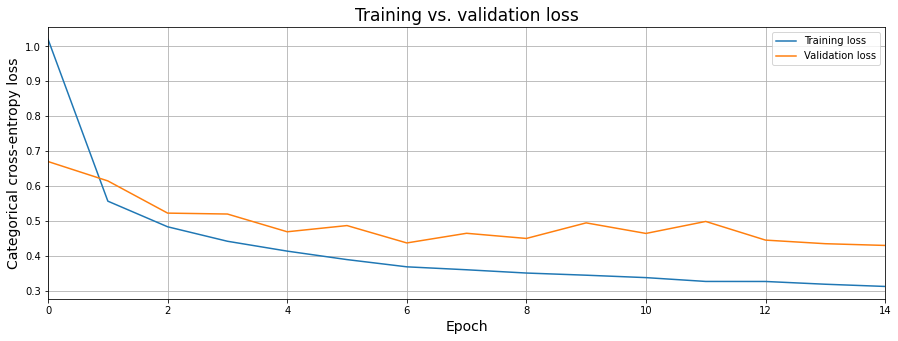

In [ ]:
# plot training, validation loss:
plt.plot(cnn_history.history['loss'], label='Training loss')
plt.plot(cnn_history.history['val_loss'], label='Validation loss')
plt.legend(loc='upper right')
plt.xlim(0, 14)
plt.title('Training vs. validation loss', fontsize=17)
plt.xlabel('Epoch', fontsize=14)
plt.ylabel('Categorical cross-entropy loss', fontsize=14)
plt.grid()
plt.show()

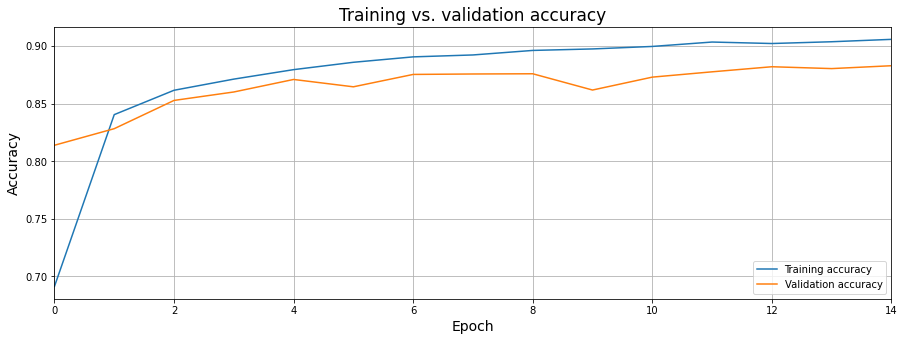

In [ ]:
# plot training, validation accuracy:
plt.plot(cnn_history.history['accuracy'], label='Training accuracy')
plt.plot(cnn_history.history['val_accuracy'], label='Validation accuracy')
plt.legend(loc='lower right')
plt.xlim(0, 14)
plt.title('Training vs. validation accuracy', fontsize=17)
plt.xlabel('Epoch', fontsize=14)
plt.ylabel('Accuracy', fontsize=14)
plt.grid()
plt.show()

It seems that we overfit, since the training loss is decreasing, but the validation loss starts to oscillate/to increase. 
However, if the validation accuracy is still increasing, then I guess it is OK.

In [ ]:
# perform predictions: 
cnn_predictions = cnn_model.predict(test_x, batch_size=32)

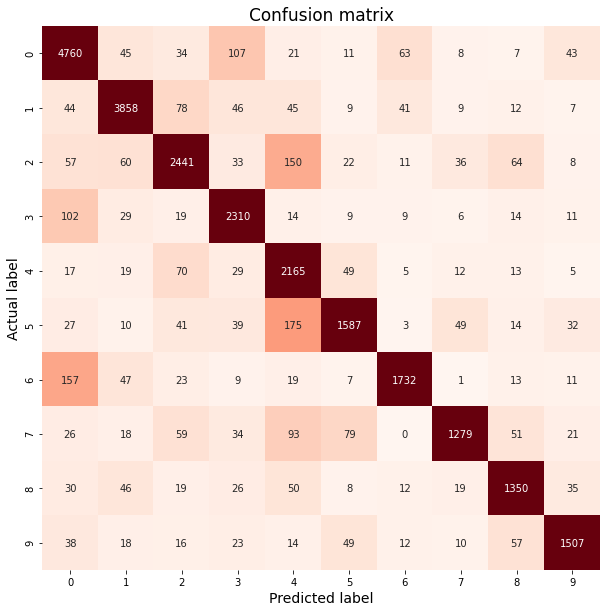

In [ ]:
# plot confusion matrix:
conf = confusion_matrix(y_pred=np.argmax(cnn_predictions, 1), y_true=np.argmax(test_y, 1))
plt.figure(figsize=(10, 10))
sns.heatmap(conf, annot=True, cmap='Reds', fmt='g', cbar=False, vmax=500)
plt.title('Confusion matrix', fontsize=17)
plt.xlabel('Predicted label', fontsize=14)
plt.ylabel('Actual label', fontsize=14)
plt.show()

The model missed sometimes (> 100) the pictures with labels 0 , 2, 3, 5, and 6.

### 5. Train an other CNN

In [ ]:
# build CNN:
cnn_model = keras.models.Sequential()
cnn_model.add(Conv2D(16, (3, 3), input_shape=train_x.shape[1:], padding='same'))
cnn_model.add(Activation('relu'))
cnn_model.add(Conv2D(16, (3, 3), padding='same'))
cnn_model.add(Activation('relu'))
cnn_model.add(MaxPooling2D(pool_size=(2,2)))

cnn_model.add(Conv2D(32, (3, 3), padding='same'))
cnn_model.add(Activation('relu'))
cnn_model.add(Conv2D(32, (3, 3), padding='same'))
cnn_model.add(Activation('relu'))
cnn_model.add(Conv2D(32, (3, 3), padding='same'))
cnn_model.add(Activation('relu'))
cnn_model.add(Conv2D(32, (3, 3), padding='same'))
cnn_model.add(Activation('relu'))
cnn_model.add(MaxPooling2D(pool_size=(2,2)))
cnn_model.add(Conv2D(32, (3, 3), padding='same'))
cnn_model.add(Activation('relu'))
cnn_model.add(Conv2D(32, (3, 3), padding='same'))
cnn_model.add(Activation('relu'))
cnn_model.add(Conv2D(32, (3, 3), padding='same'))
cnn_model.add(Activation('relu'))
cnn_model.add(MaxPooling2D(pool_size=(2,2)))
cnn_model.add(Conv2D(32, (3, 3), padding='same'))
cnn_model.add(Activation('relu'))
cnn_model.add(Conv2D(32, (3, 3), padding='same'))
cnn_model.add(Activation('relu'))
cnn_model.add(Flatten())

cnn_model.add(Dense(10))
cnn_model.add(Activation('softmax'))

In [ ]:
# compile model with Adam optimizer, use categorical crossentropy as loss function:
cnn_model.compile(loss='categorical_crossentropy', optimizer=keras.optimizers.Adam(), metrics=['accuracy'])

# fit model:
cnn_history = cnn_model.fit(train_x, train_y, batch_size=32,
                            epochs=10, validation_data=(test_x, test_y))

Epoch 1/10
2290/2290 [==============================] - 13s 6ms/step - loss: 0.2834 - accuracy: 0.9143 - val_loss: 0.3453 - val_accuracy: 0.9004
Epoch 2/10
2290/2290 [==============================] - 13s 6ms/step - loss: 0.2737 - accuracy: 0.9182 - val_loss: 0.3352 - val_accuracy: 0.9063
Epoch 3/10
2290/2290 [==============================] - 13s 6ms/step - loss: 0.2624 - accuracy: 0.9206 - val_loss: 0.3426 - val_accuracy: 0.9020
Epoch 4/10
2290/2290 [==============================] - 12s 5ms/step - loss: 0.2637 - accuracy: 0.9209 - val_loss: 0.3354 - val_accuracy: 0.9058
Epoch 5/10
2290/2290 [==============================] - 13s 6ms/step - loss: 0.2662 - accuracy: 0.9199 - val_loss: 0.3260 - val_accuracy: 0.9078
Epoch 6/10
2290/2290 [==============================] - 13s 6ms/step - loss: 0.2573 - accuracy: 0.9219 - val_loss: 0.3203 - val_accuracy: 0.9101
Epoch 7/10
2290/2290 [==============================] - 13s 6ms/step - loss: 0.2514 - accuracy: 0.9238 - val_loss: 0.3119 - val_ac

In [ ]:
cnn_model.summary()

Model: "sequential_18"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_101 (Conv2D)          (None, 32, 32, 16)        448       
_________________________________________________________________
activation_113 (Activation)  (None, 32, 32, 16)        0         
_________________________________________________________________
conv2d_102 (Conv2D)          (None, 32, 32, 16)        2320      
_________________________________________________________________
activation_114 (Activation)  (None, 32, 32, 16)        0         
_________________________________________________________________
max_pooling2d_39 (MaxPooling (None, 16, 16, 16)        0         
_________________________________________________________________
conv2d_103 (Conv2D)          (None, 16, 16, 32)        4640      
_________________________________________________________________
activation_115 (Activation)  (None, 16, 16, 32)      

The model has 86,552 parameters in total.

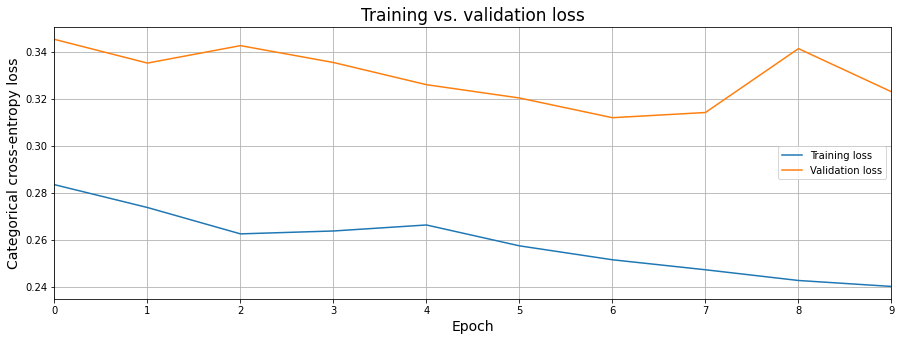

In [ ]:
# plot training, validation loss:
plt.plot(cnn_history.history['loss'], label='Training loss')
plt.plot(cnn_history.history['val_loss'], label='Validation loss')
plt.legend(loc='right')
plt.xlim(0, 9)
plt.title('Training vs. validation loss', fontsize=17)
plt.xlabel('Epoch', fontsize=14)
plt.ylabel('Categorical cross-entropy loss', fontsize=14)
plt.grid()
plt.show()

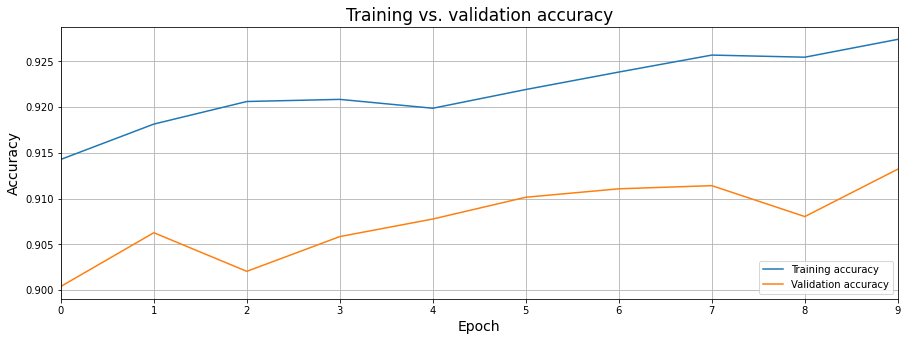

In [ ]:
# plot training, validation accuracy:
plt.plot(cnn_history.history['accuracy'], label='Training accuracy')
plt.plot(cnn_history.history['val_accuracy'], label='Validation accuracy')
plt.legend(loc='lower right')
plt.xlim(0, 9)
plt.title('Training vs. validation accuracy', fontsize=17)
plt.xlabel('Epoch', fontsize=14)
plt.ylabel('Accuracy', fontsize=14)
plt.grid()
plt.show()

As we can see, the model's accuracy reached it's maximum value in the 10th epoch (for both validation and train data). <br>
However, the lowest validation loss value is reached in the 6th epoch.